<a href="https://colab.research.google.com/github/Yashasviravipati/My-Store/blob/main/PDS(asg1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os


os.makedirs("results/figures", exist_ok=True)

# Save the figure
plt.savefig("results/figures/grip_strength_vs_frailty.png")
plt.close()


In [17]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=ef9c9bef56dcca2b7b7fe75163799c22c6d09da30ac4eb136ab54919fac9df1c
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [20]:
from fpdf import FPDF

pdf = FPDF()


**Stage 1: Data Collection & Preprocessing (Raw Data Stage)**

**Work Done:**

**Data Collection**: The raw data (from your table) will be collected manually or stored in a .csv file.

**Data Cleaning:** Handle any missing or erroneous values, and standardize units if needed (e.g., converting weight from pounds to kilograms).

**Feature Engineering:** For example, creating BMI (Body Mass Index) based on height and weight if relevant.

**Frailty Encoding:** Convert the qualitative attribute of Frailty (Y/N) into a binary representation (1/0).

In [1]:
import pandas as pd

# Raw data provided in the table

In [2]:
data = {
    "Height": [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    "Weight": [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    "Age": [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    "Grip strength": [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    "Frailty": ["N", "N", "N", "Y", "Y", "N", "Y", "Y", "N", "N"]
}

# Convert to DataFrame

In [4]:
df = pd.DataFrame(data)

# Convert Frailty from categorical (Y/N) to numerical (1/0)

In [5]:
df["Frailty"] = df["Frailty"].map({"Y": 1, "N": 0})

# Save the data to CSV

In [8]:
df.to_csv('data_raw/frailty_data.csv', index=False)

**Stage 2: Data Processing & Analysis**

**Work Done**:

**Statistical Analysis:** Perform basic statistics (mean, standard deviation) to understand the data.

**Exploratory Data Analysis (EDA):** Visualize the correlation between features such as grip strength, age, weight, and frailty scores.

**Correlation:** Check how different variables (grip strength, age, etc.) correlate with frailty.

**Modeling (Optional):** If desired, perform predictive analysis to predict frailty based on other attributes (e.g., grip strength).

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load cleaned data
df = pd.read_csv('data_raw/frailty_data.csv')

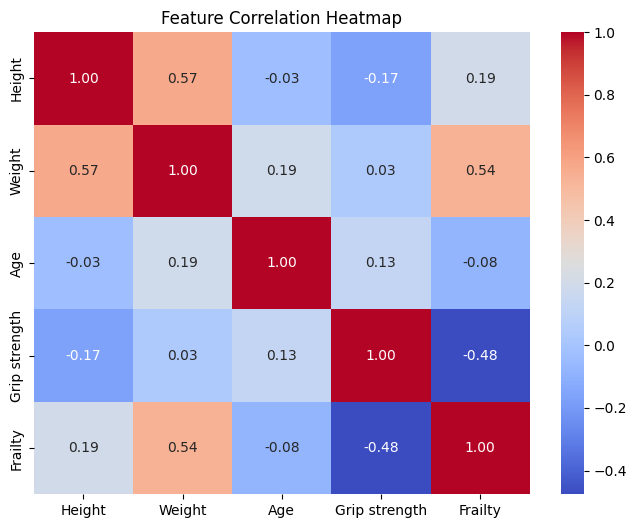

In [11]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

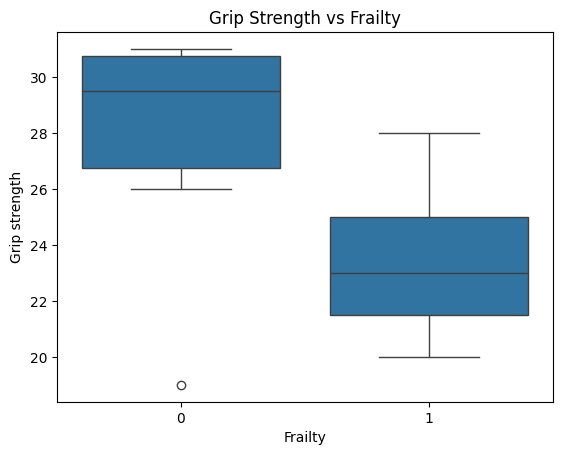

In [12]:
# Boxplot of Grip strength vs Frailty
sns.boxplot(x="Frailty", y="Grip strength", data=df)
plt.title("Grip Strength vs Frailty")
plt.show()

**Stage 3: Results & Reporting**

**Work Done:**

**Visualizations:** Create meaningful visualizations (boxplots, histograms, scatter plots) to summarize the insights.

**Reporting:** Summarize findings in a report, including conclusions and recommendations.

**Results Export:** Save the processed data and final analysis (graphs, tables) for future use or sharing.

In [15]:
# Save figures
plt.figure(figsize=(8,5))
sns.boxplot(x="Frailty", y="Grip strength", data=df)
plt.title("Grip Strength vs Frailty")
plt.savefig("results/figures/grip_strength_vs_frailty.png")
plt.close()

In [23]:
from fpdf import FPDF

# Create a PDF object
pdf = FPDF()

# Set document properties
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add content to the PDF
pdf.cell(200, 10, txt="Frailty Data Analysis Report", ln=True, align="C")

# Save the PDF
os.makedirs("results/reports", exist_ok=True)  # Ensure the directory exists
pdf.output("results/reports/frailty_analysis.pdf")

print("PDF report saved successfully!")


PDF report saved successfully!
